<a href="https://colab.research.google.com/github/ellieyakim0829/dataAnalysis/blob/main/2_%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_OpenAPI_xml_%EC%8B%A4%EC%8A%B5_20240501.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석

## 5. OpenAPI를 이용한 데이터 수집

### #그래프에서 한글사용하는 방법
- **(코랩에서)한글폰트 설치하기**

In [18]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 코랩에서 위 코드를 실행시킨 후  반드시 코랩 메뉴: "런타임>런타임 다시 시작" 합니다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

- **한글 폰트 지정하기**

In [1]:
# 코랩에서 한글 폰트 종류와 이름이 win과 다를 수 있다!!!
# 코랩: NanumGothic, 윈도우: Malgun Gothic
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'NanumBarunGothic',
                     'font.size': 12,
                     'figure.figsize': (6, 4),
                     'axes.unicode_minus':  False }) # 폰트 설정

---

### <a name="1)OpenAPI통한데이터수집">1) OpenAPI 통한 데이터 수집</a>

#### 1.도서관 정보나루  OpenAPI 신청하기
*  도서관 데이터 제공, 신청 활용 가능
    - 오픈 API 활용 방법: https://www.data4library.kr/apiUtilization
    - OpenAPI 신청하기: https://www.data4library.kr/myPage?isValid=true

#### 도서관 정보나루 API 사용하여 데이터 수집하기

In [2]:
# requests 설치
!pip install requests

In [3]:
import requests
import xml.etree.ElementTree as ET #Python의 표준 라이브러리 중 하나로 XML 데이터를 파싱하고, XML 트리를 생성하고, XML 문서를 생성하는 기능

# URL 설정
url = "http://data4library.kr/api/loanItemSrch?authKey=b8604a40cf9f0ce1e10c1d20ac9c70e6b6ddf0a5b7b751370b67131552680c20&startDt=2024-01-01&endDt=2024-04-30&gender=0;1&age=30;40;50&region=11"

# GET 요청을 보내고 응답을 받습니다.
r = requests.get(url)
print(r)

# 응답의 인코딩을 UTF-8로 설정합니다.
r.encoding = 'UTF-8'

# 응답을 XML 형식으로 파싱합니다.
tree = ET.fromstring(r.text)
print(tree)

<Response [200]>
<Element 'response' at 0x7c72304b6750>


In [4]:
import requests
import xml.etree.ElementTree as ET
from urllib.parse import urlparse, parse_qs

url = 'http://data4library.kr/api/loanItemSrch?authKey=b8604a40cf9f0ce1e10c1d20ac9c70e6b6ddf0a5b7b751370b67131552680c20&startDt=2024-01-01&endDt=2024-04-30&gender=0;1&age=30;40;50&region=11'

# URL을 파싱하여 쿼리 문자열의 매개변수를 가져옵니다.
parsed_url = urlparse(url)
query_params = parse_qs(parsed_url.query)

# 각 매개변수의 값을 가져옵니다.
gender = query_params.get('gender', [''])[0]
age = query_params.get('age', [''])[0]
addCode = query_params.get('addCode', [''])[0]
kdc = query_params.get('kdc', [''])[0]
region = query_params.get('region', [''])[0]

print("Gender:", gender)
print("Age:", age)
print("Add Code:", addCode)
print("KDC:", kdc)
print("Region:", region)

# URL에서 XML 데이터를 가져옵니다.
response = requests.get(url)

# 응답의 텍스트를 XML 문자열로 변환합니다.
xml_data = response.text

# XML 문자열을 파싱합니다.
root = ET.fromstring(xml_data)

# 각 도서 정보에 접근하여 출력합니다.
for doc in root.findall('docs/doc'):
    bookname = doc.find('bookname').text
    ranking = doc.find('ranking').text
    authors = doc.find('authors').text
    publisher = doc.find('publisher').text
    publication_year = doc.find('publication_year').text
    isbn13 = doc.find('isbn13').text
    loan_count = doc.find('loan_count').text
    print("도서명:", bookname)
    print("순위",ranking)
    print("저자:", authors)
    print("출판사:", publisher)
    print("출판년도:", publication_year)
    print("ISBN:", isbn13)
    print("대출 횟수:", loan_count)
    print("-----")

Gender: 0;1
Age: 30;40;50
Add Code: 
KDC: 
Region: 11
도서명: 불편한 편의점 :김호연 장편소설
순위 1
저자: 지은이: 김호연
출판사: 나무옆의자
출판년도: 2021
ISBN: 9791161571188
대출 횟수: 1847
-----
도서명: 불편한 편의점 :김호연 장편소설
순위 2
저자: 지은이: 김호연
출판사: 나무옆의자
출판년도: 2022
ISBN: 9791161571379
대출 횟수: 1543
-----
도서명: 아버지의 해방일지 :정지아 장편소설
순위 3
저자: 지은이: 정지아
출판사: 창비
출판년도: 2022
ISBN: 9788936438838
대출 횟수: 1501
-----
도서명: 신사고 SSEN 쎈 고등 수학 1 + 수학 2 세트 ( 2014 고1적용 / 새교육과정 ) - 오답노트+단어장 사은품증정
순위 4
저자: None
출판사: 좋은책신사고
출판년도: 2013
ISBN: 0000000000000
대출 횟수: 1354
-----
도서명: 메리골드 마음 세탁소 =윤정은 장편소설 /Marigold mind laundry
순위 5
저자: 글: 윤정은
출판사: 북로망스
출판년도: 2023
ISBN: 9791191891287
대출 횟수: 1340
-----
도서명: 도시와 그 불확실한 벽 :무라카미 하루키 장편소설
순위 6
저자: 지은이: 무라카미 하루키 ;옮긴이: 홍은주
출판사: 문학동네
출판년도: 2023
ISBN: 9788954699075
대출 횟수: 1303
-----
도서명: 도둑맞은 집중력 :집중력 위기의 시대, 삶의 주도권을 되찾는 법
순위 7
저자: 요한 하리 지음 ;김하현 옮김
출판사: 어크로스(어크로스출판그룹)
출판년도: 2023
ISBN: 9791167740984
대출 횟수: 1290
-----
도서명: 맡겨진 소녀 :클레어 키건 소설
순위 8
저자: 지은이: 클레어 키건 ;옮긴이: 허진
출판사: 다산북스
출판년도: 2023
ISBN: 9791130698199
대출 횟수: 1286
----

In [5]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd

url = 'http://data4library.kr/api/loanItemSrch?authKey=b8604a40cf9f0ce1e10c1d20ac9c70e6b6ddf0a5b7b751370b67131552680c20&startDt=2024-01-01&endDt=2024-04-30&gender=0;1&age=30;40;50&region=11'

# URL에서 XML 데이터 추출
response = requests.get(url)

# XML 데이터를 파싱하여 ElementTree 객체로 변환
root = ET.fromstring(response.content)

# 'request' 요소에서 매개변수 정보를 추출하여 딕셔너리에 저장
params_data = {
    '성별': root.find('.//request/gender').text,
    '연령': root.find('.//request/age').text,
    '지역': root.find('.//request/region').text
    }

# 매개변수 정보를 DataFrame으로 변환
params_df = pd.DataFrame([params_data])

# 도서 정보를 저장할 리스트 초기화
books = []

# 각 도서 정보에 접근하여 리스트에 추가
for doc in root.findall('.//docs/doc'):
    bookname = doc.find('bookname').text
    ranking = doc.find('ranking').text
    authors = doc.find('authors').text
    publisher = doc.find('publisher').text
    publication_year = doc.find('publication_year').text
    isbn13 = doc.find('isbn13').text
    class_nm = doc.find('class_nm').text
    loan_count = doc.find('loan_count').text
    bookImageURL = doc.find('bookImageURL').text
    bookDtlUrl = doc.find('bookDtlUrl').text

    books.append({
        '도서명': bookname,
        '순위': ranking,
        '저자': authors,
        '출판사': publisher,
        '출판년도': publication_year,
        'ISBN': isbn13,
        '주제분류명':class_nm,
        '대출 횟수': loan_count,
        '책표지': bookImageURL,
        '도서상세페이지 URL': bookDtlUrl
    })

# 도서 정보를 DataFrame으로 변환
books_df = pd.DataFrame(books)

# 매개변수 정보와 도서 정보를 가로 방향으로 결합하여 하나의 DataFrame으로 만듭니다.
result_df = pd.concat([params_df, books_df], axis=1)
result_df.head(2)
# # 결과 DataFrame 출력
# print(result_df)

,성별,연령,지역,도서명,순위,저자,출판사,출판년도,ISBN,주제분류명,대출 횟수,책표지,도서상세페이지 URL
0,0;1,30;40;50,11,불편한 편의점 :김호연 장편소설,1,지은이: 김호연,나무옆의자,2021,9791161571188,문학 > 한국문학 > 소설,1847,https://image.aladin.co.kr/product/26942/84/co...,https://data4library.kr/bookV?seq=5962217
1,NaN,NaN,NaN,불편한 편의점 :김호연 장편소설,2,지은이: 김호연,나무옆의자,2022,9791161571379,문학 > 한국문학 > 소설,1543,https://image.aladin.co.kr/product/29858/98/co...,https://data4library.kr/bookV?seq=6529613


In [58]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd

url = 'http://data4library.kr/api/loanItemSrch?authKey=b8604a40cf9f0ce1e10c1d20ac9c70e6b6ddf0a5b7b751370b67131552680c20&startDt=2023-04-01&endDt=2024-04-29&gender=0;1&age=8;20;30;40;50;60&region=11&addCode=0;1;2;4;5;6;7;9&kdc=0;1;2;3;4;5;6;7;8;9'

# URL에서 XML 데이터 추출
response = requests.get(url)

# XML 데이터를 파싱하여 ElementTree 객체로 변환
root = ET.fromstring(response.content)

# 도서 정보를 저장할 리스트 초기화
books = []

# 각 도서 정보에 접근하여 리스트에 추가
for doc in root.findall('.//docs/doc'):
    ranking = doc.find('ranking').text
    bookname = doc.find('bookname').text
    ranking = doc.find('ranking').text
    authors = doc.find('authors').text
    publisher = doc.find('publisher').text
    publication_year = doc.find('publication_year').text
    isbn13 = doc.find('isbn13').text
    class_nm = doc.find('class_nm').text
    loan_count = doc.find('loan_count').text
    bookImageURL = doc.find('bookImageURL').text
    bookDtlUrl = doc.find('bookDtlUrl').text

    books.append({
        '순위': ranking,
        '도서명': bookname,
        '순위': ranking,
        '저자': authors,
        '출판사': publisher,
        '출판년도': publication_year,
        'ISBN': isbn13,
        '주제분류명':class_nm,
        '대출 횟수': loan_count,
        '책표지': bookImageURL,
        '도서상세페이지 URL': bookDtlUrl
    })

# 도서 정보를 DataFrame으로 변환
books_df = pd.DataFrame(books)
books_df.head(5)
# DataFrame 출력
# print(books_df)

,순위,도서명,저자,출판사,출판년도,ISBN,주제분류명,대출 횟수,책표지,도서상세페이지 URL
0,1,불편한 편의점 :김호연 장편소설,지은이: 김호연,나무옆의자,2021,9791161571188,문학 > 한국문학 > 소설,8732,https://image.aladin.co.kr/product/26942/84/co...,https://data4library.kr/bookV?seq=5962217
1,2,불편한 편의점 :김호연 장편소설,지은이: 김호연,나무옆의자,2022,9791161571379,문학 > 한국문학 > 소설,7295,https://image.aladin.co.kr/product/29858/98/co...,https://data4library.kr/bookV?seq=6529613
2,3,아버지의 해방일지 :정지아 장편소설,지은이: 정지아,창비,2022,9788936438838,문학 > 한국문학 > 소설,7267,https://image.aladin.co.kr/product/30048/51/co...,https://data4library.kr/bookV?seq=6551957
3,4,달러구트 꿈 백화점 :이미예 장편소설,지은이: 이미예,팩토리나인,2020,9791165341909,문학 > 한국문학 > 소설,5712,https://image.aladin.co.kr/product/24512/70/co...,https://data4library.kr/bookV?seq=5707051
4,5,역행자 :돈·시간·운명으로부터 완전한 자유를 얻는 7단계 인생 공략집,자청 지음,웅진씽크빅,2022,9788901260716,사회과학 > 경제학 > 경영관리,5391,https://image.aladin.co.kr/product/29521/63/co...,https://data4library.kr/bookV?seq=6468069


In [60]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   성별           1 non-null      object
 1   연령           1 non-null      object
 2   지역           1 non-null      object
 3   도서명          200 non-null    object
 4   순위           200 non-null    object
 5   저자           199 non-null    object
 6   출판사          200 non-null    object
 7   출판년도         200 non-null    object
 8   ISBN         200 non-null    object
 9   주제분류명        193 non-null    object
 10  대출 횟수        200 non-null    object
 11  책표지          200 non-null    object
 12  도서상세페이지 URL  200 non-null    object
dtypes: object(13)
memory usage: 20.4+ KB


In [61]:
!pip install missingno

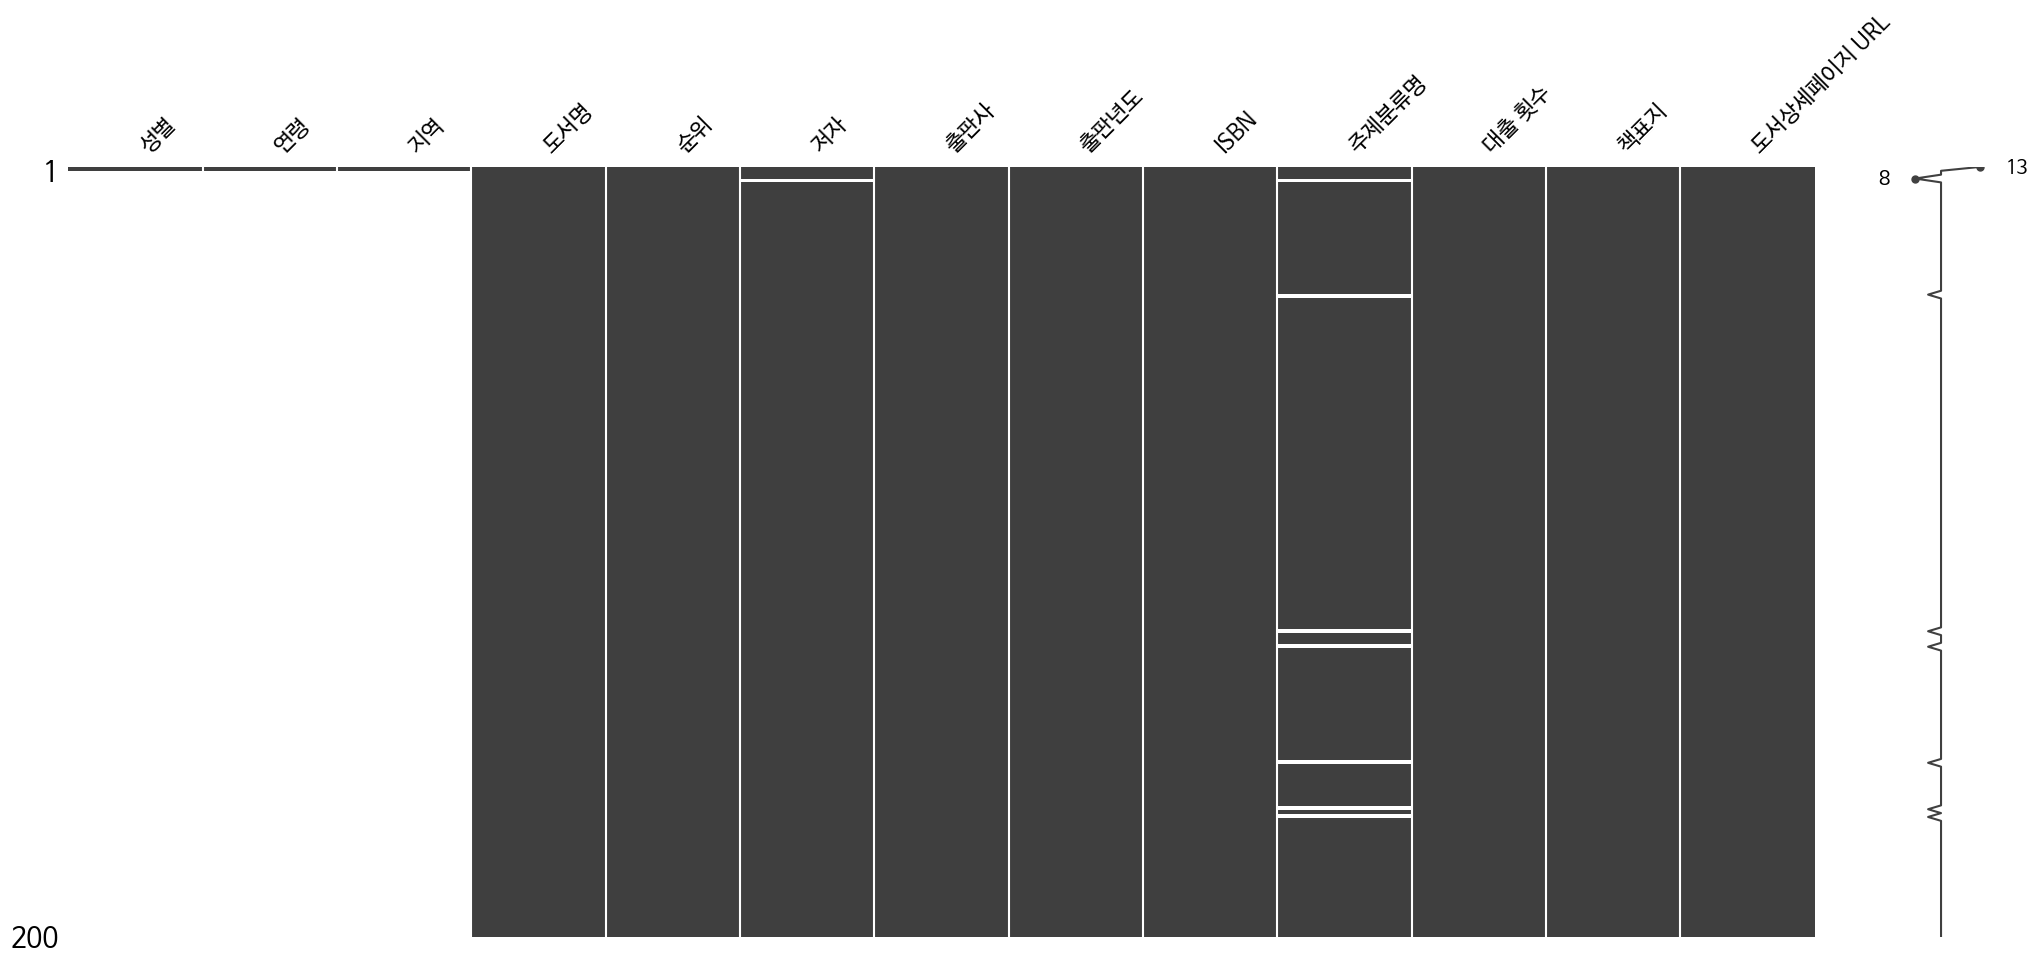

In [62]:
import missingno as msno
msno.matrix(result_df)
plt.show()

# 현재 DataFrame의 열 이름 확인

In [63]:
print(f"현재 DataFrame의 열 이름:, {result_df.columns}")
result_df.head(3)

현재 DataFrame의 열 이름:, Index(['성별', '연령', '지역', '도서명', '순위', '저자', '출판사', '출판년도', 'ISBN', '주제분류명',
       '대출 횟수', '책표지', '도서상세페이지 URL'],
      dtype='object')


,성별,연령,지역,도서명,순위,저자,출판사,출판년도,ISBN,주제분류명,대출 횟수,책표지,도서상세페이지 URL
0,0;1,30;40;50,11,불편한 편의점 :김호연 장편소설,1,지은이: 김호연,나무옆의자,2021,9791161571188,문학 > 한국문학 > 소설,1847,https://image.aladin.co.kr/product/26942/84/co...,https://data4library.kr/bookV?seq=5962217
1,NaN,NaN,NaN,불편한 편의점 :김호연 장편소설,2,지은이: 김호연,나무옆의자,2022,9791161571379,문학 > 한국문학 > 소설,1543,https://image.aladin.co.kr/product/29858/98/co...,https://data4library.kr/bookV?seq=6529613
2,NaN,NaN,NaN,아버지의 해방일지 :정지아 장편소설,3,지은이: 정지아,창비,2022,9788936438838,문학 > 한국문학 > 소설,1501,https://image.aladin.co.kr/product/30048/51/co...,https://data4library.kr/bookV?seq=6551957


# 도서명에서 중복되는 값 제거 하기

In [100]:
# 중복 되지 않은 값의 개수와  책 이름을 확인
# print( f'#고유한 값 갯수:{len(books_df.도서명.unique())}' )
# print( f'#고유한 책 이름명:{books_df.도서명.unique()}' )

# '도서명' 열에서 중복되지 않는 고유한 값들을 추출하여 unique_books 변수에 저장
# unique_books = books_df['도서명'].unique()
# print(len(unique_books))

# # '도서명' 열을 기준으로 중복된 값을 제거하고 고유한 값들을 추출하여 unique_books_df 변수에 저장 새로운 DataFrame을 생성
unique_books_df = books_df.drop_duplicates(subset=['도서명'])
print(len(unique_books_df))
unique_books_df.head(5)




106


,순위,도서명,저자,출판사,출판년도,ISBN,주제분류명,대출 횟수,책표지,도서상세페이지 URL
0,1,불편한 편의점 :김호연 장편소설,지은이: 김호연,나무옆의자,2021,9791161571188,문학 > 한국문학 > 소설,8732,https://image.aladin.co.kr/product/26942/84/co...,https://data4library.kr/bookV?seq=5962217
1,3,아버지의 해방일지 :정지아 장편소설,지은이: 정지아,창비,2022,9788936438838,문학 > 한국문학 > 소설,7267,https://image.aladin.co.kr/product/30048/51/co...,https://data4library.kr/bookV?seq=6551957
2,4,달러구트 꿈 백화점 :이미예 장편소설,지은이: 이미예,팩토리나인,2020,9791165341909,문학 > 한국문학 > 소설,5712,https://image.aladin.co.kr/product/24512/70/co...,https://data4library.kr/bookV?seq=5707051
3,5,역행자 :돈·시간·운명으로부터 완전한 자유를 얻는 7단계 인생 공략집,자청 지음,웅진씽크빅,2022,9788901260716,사회과학 > 경제학 > 경영관리,5391,https://image.aladin.co.kr/product/29521/63/co...,https://data4library.kr/bookV?seq=6468069
4,6,"물고기는 존재하지 않는다 :상실, 사랑 그리고 숨어 있는 삶의 질서에 관한 이야기",룰루 밀러 지음 ;정지인 옮김,곰출판,2021,9791189327156,자연과학 > 동물학 > 동물학,5325,https://image.aladin.co.kr/product/28465/73/co...,https://data4library.kr/bookV?seq=6360937


#### 6.가공된 파일 신규 저장하기

In [101]:
# 가공된 DataFrame을 CSV 파일로 저장
outfile = 'BestLoanList_books_data.csv'
unique_books_df.to_csv(outfile, encoding='cp949', mode='w', index=False)

#### 7.가공된 csv 파일 확인하기

In [109]:
unique_books_Top10_df = pd.read_csv('BestLoanList_books_data.csv', encoding='cp949')

print(f"현재 DataFrame의 열 이름:, {unique_books_df.columns}")
unique_books_Top10_df.head(10)

현재 DataFrame의 열 이름:, Index(['순위', '도서명', '저자', '출판사', '출판년도', 'ISBN', '주제분류명', '대출 횟수', '책표지',
       '도서상세페이지 URL'],
      dtype='object')


,순위,도서명,저자,출판사,출판년도,ISBN,주제분류명,대출 횟수,책표지,도서상세페이지 URL
0,1,불편한 편의점 :김호연 장편소설,지은이: 김호연,나무옆의자,2021,9791161571188,문학 > 한국문학 > 소설,8732,https://image.aladin.co.kr/product/26942/84/co...,https://data4library.kr/bookV?seq=5962217
1,3,아버지의 해방일지 :정지아 장편소설,지은이: 정지아,창비,2022,9788936438838,문학 > 한국문학 > 소설,7267,https://image.aladin.co.kr/product/30048/51/co...,https://data4library.kr/bookV?seq=6551957
2,4,달러구트 꿈 백화점 :이미예 장편소설,지은이: 이미예,팩토리나인,2020,9791165341909,문학 > 한국문학 > 소설,5712,https://image.aladin.co.kr/product/24512/70/co...,https://data4library.kr/bookV?seq=5707051
3,5,역행자 :돈·시간·운명으로부터 완전한 자유를 얻는 7단계 인생 공략집,자청 지음,웅진씽크빅,2022,9788901260716,사회과학 > 경제학 > 경영관리,5391,https://image.aladin.co.kr/product/29521/63/co...,https://data4library.kr/bookV?seq=6468069
4,6,"물고기는 존재하지 않는다 :상실, 사랑 그리고 숨어 있는 삶의 질서에 관한 이야기",룰루 밀러 지음 ;정지인 옮김,곰출판,2021,9791189327156,자연과학 > 동물학 > 동물학,5325,https://image.aladin.co.kr/product/28465/73/co...,https://data4library.kr/bookV?seq=6360937
5,7,밝은 밤 :최은영 장편소설,지은이: 최은영,문학동네,2021,9788954681179,문학 > 한국문학 > 소설,5097,https://image.aladin.co.kr/product/27541/91/co...,https://data4library.kr/bookV?seq=6045915
6,8,"어서오세요, 휴남동 서점입니다 :황보름 장편소설",지은이: 황보름,클레이하우스,2022,9791197377143,문학 > 한국문학 > 소설,4988,https://image.aladin.co.kr/product/28685/95/co...,https://data4library.kr/bookV?seq=6389692
7,9,작별인사 :김영하 장편소설,지은이: 김영하,복복서가,2022,9791191114225,문학 > 한국문학 > 소설,4843,https://image.aladin.co.kr/product/29281/68/co...,https://data4library.kr/bookV?seq=6446085
8,10,파친코 :이민진 장편소설,이민진 지음 ;이미정 옮김,문학사상,2018,9788970129815,문학 > 영미문학 > 소설,4677,https://bookthumb-phinf.pstatic.net/cover/134/...,https://data4library.kr/bookV?seq=3723218
9,11,하얼빈 :김훈 장편소설,지은이: 김훈,문학동네,2022,9788954699914,문학 > 한국문학 > 소설,4448,https://image.aladin.co.kr/product/29857/0/cov...,https://data4library.kr/bookV?seq=6529620


# 막대 그래프로 표시하기

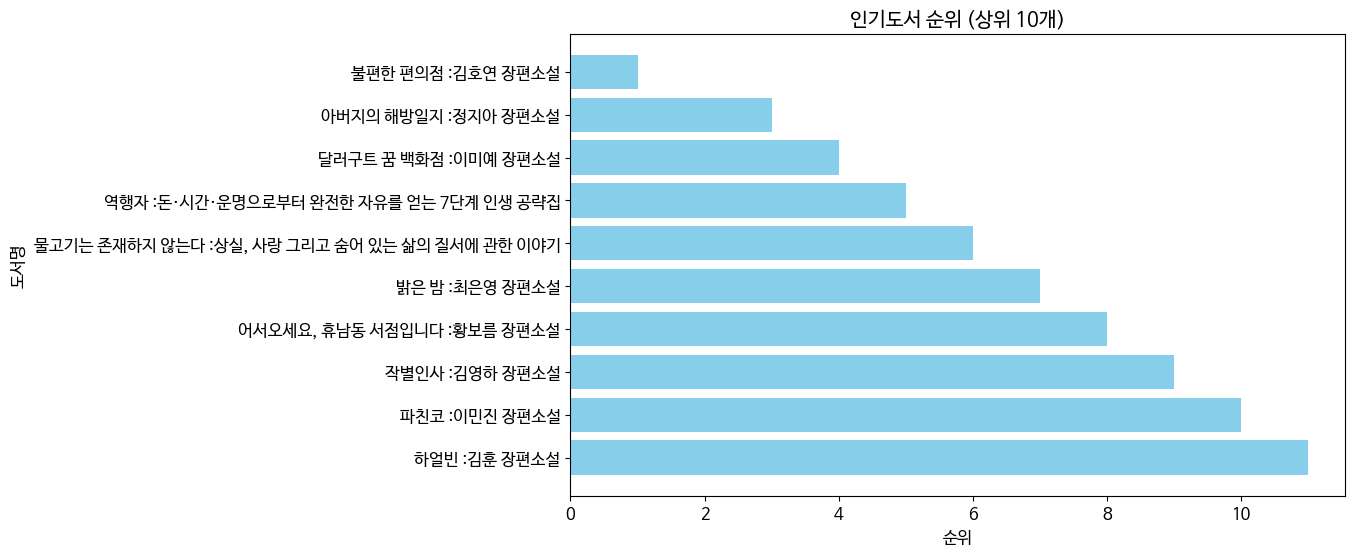

In [110]:
import matplotlib.pyplot as plt

# 인기도서 순위 데이터 가져오기
rankings = unique_books_Top10_df['순위'].astype(int)
books_names = unique_books_Top10_df['도서명']

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.barh(books_names.head(10), rankings.head(10), color='skyblue')  # head(10)을 사용하여 상위 10개만 선택
plt.xlabel('순위')
plt.ylabel('도서명')
plt.title('인기도서 순위 (상위 10개)')
plt.gca().invert_yaxis()  # y 축 역순으로 변경하여 1위가 위로 오도록 설정
plt.show()

# 원 그래프로 표시하기

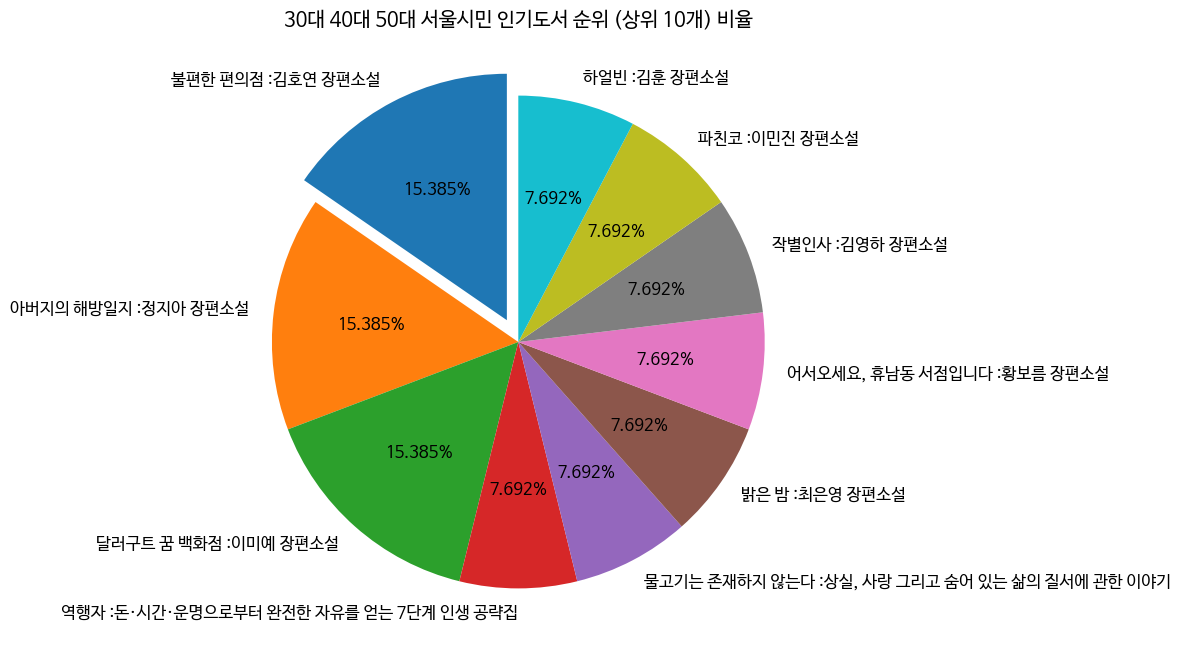

In [104]:
# 순위별 도서 수 세기
# 상위 10개의 도서명과 해당 도서의 비율(퍼센트) 계산
top_10_books = unique_books_Top10_df['도서명'].head(10)
book_percentages = (unique_books_Top10_df['순위'].value_counts(normalize=True) * 100).head(10)

# 파이 그래프로 나타내기
plt.figure(figsize=(8, 8))
plt.pie(book_percentages, labels=top_10_books, autopct='%.3f%%', startangle=90, explode=[0.1]+[0]*9)
plt.title('30대 40대 50대 서울시민 인기도서 순위 (상위 10개) 비율')
plt.show()


###대출건수를 계산할 때 각 책을 구분할 수 있는 고유한 식별자 가장 일반적인 고유한 식별자는 ISBN (International Standard Book Number)입니다. 각 책에는 고유한 ISBN이 부여되어 있으므로 이를 활용하여 대출건수를 계산하면 된다.

####1.먼저, 데이터를 읽어올 때 ISBN 컬럼을 사용하여 DataFrame을 생성합니다.
####2.도서명 대신 ISBN을 사용하여 각 책의 대출건수를 계산합니다.
####3.필요에 따라 ISBN을 인덱스로 설정하여 데이터를 재구성합니다.
####4.이후에 대출건수 순위를 계산하고 시각화합니다.

In [111]:
# import pandas as pd

# # ISBN과 대출 횟수를 포함한 데이터 파일을 불러옵니다.
# books_data = pd.read_csv('BestLoanList_books_data.csv', encoding='cp949')

# ISBN을 기준으로 대출 횟수와 도서명을 포함한 데이터를 생성합니다.
books_with_loan_count = unique_books_Top10_df[['ISBN','대출 횟수', '도서명']]

# ISBN을 인덱스로 설정합니다.
books_with_loan_count.set_index('ISBN', inplace=True)

# 대출 횟수에 따라 정렬한 뒤 상위 10개의 도서를 선택합니다.
top_10_books_with_loan_count = books_with_loan_count.sort_values(by='대출 횟수', ascending=False).head(10)

# 결과를 출력합니다.
print(top_10_books_with_loan_count)
top_10_books_with_loan_count

               대출 횟수                                            도서명
ISBN                                                               
9791161571188   8732                              불편한 편의점 :김호연 장편소설
9788936438838   7267                            아버지의 해방일지 :정지아 장편소설
9791165341909   5712                           달러구트 꿈 백화점 :이미예 장편소설
9788901260716   5391         역행자 :돈·시간·운명으로부터 완전한 자유를 얻는 7단계 인생 공략집
9791189327156   5325  물고기는 존재하지 않는다 :상실, 사랑 그리고 숨어 있는 삶의 질서에 관한 이야기
9788954681179   5097                                 밝은 밤 :최은영 장편소설
9791197377143   4988                     어서오세요, 휴남동 서점입니다 :황보름 장편소설
9791191114225   4843                                 작별인사 :김영하 장편소설
9788970129815   4677                                  파친코 :이민진 장편소설
9788954699914   4448                                   하얼빈 :김훈 장편소설


,대출 횟수,도서명
ISBN,,
9791161571188,8732,불편한 편의점 :김호연 장편소설
9788936438838,7267,아버지의 해방일지 :정지아 장편소설
9791165341909,5712,달러구트 꿈 백화점 :이미예 장편소설
9788901260716,5391,역행자 :돈·시간·운명으로부터 완전한 자유를 얻는 7단계 인생 공략집
9791189327156,5325,"물고기는 존재하지 않는다 :상실, 사랑 그리고 숨어 있는 삶의 질서에 관한 이야기"
9788954681179,5097,밝은 밤 :최은영 장편소설
9791197377143,4988,"어서오세요, 휴남동 서점입니다 :황보름 장편소설"
9791191114225,4843,작별인사 :김영하 장편소설
9788970129815,4677,파친코 :이민진 장편소설


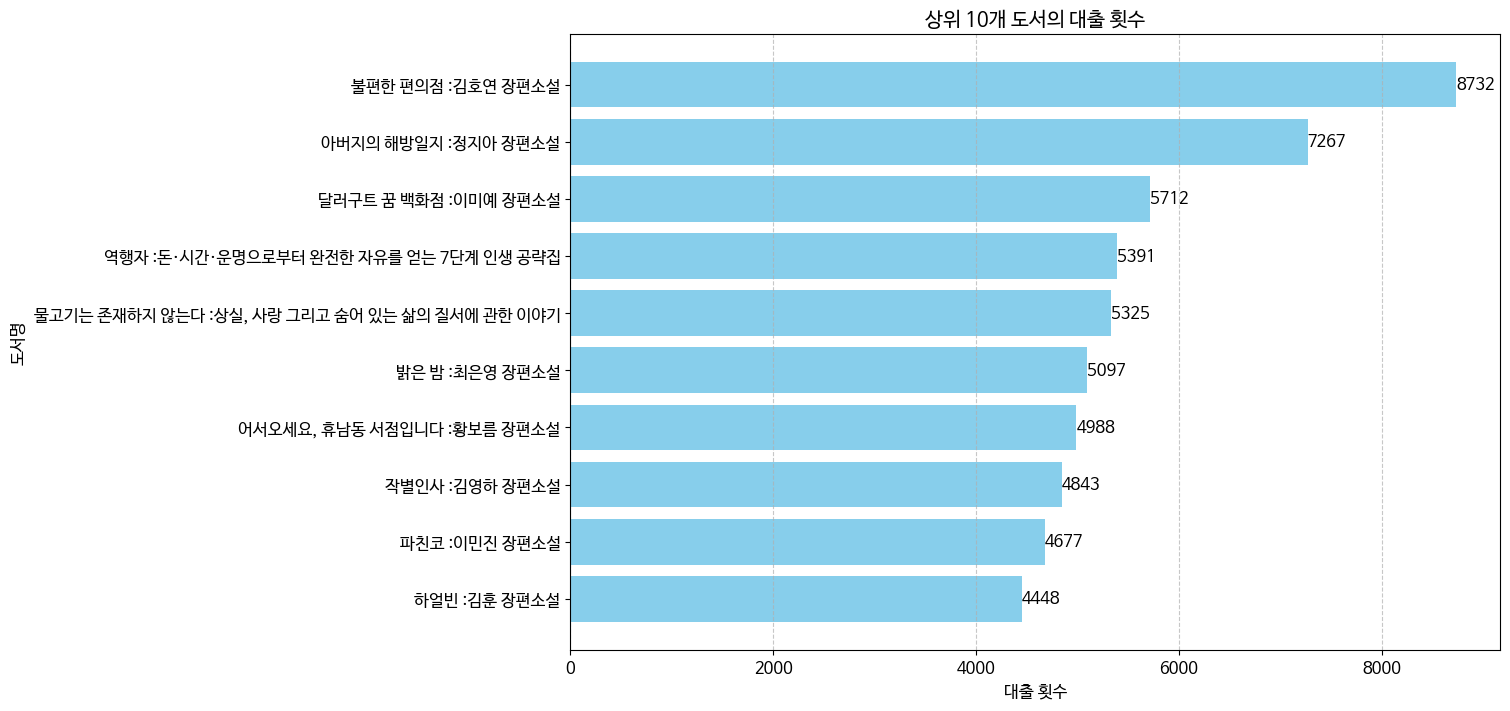

In [112]:
import matplotlib.pyplot as plt

# 상위 10개의 도서명과 대출 횟수를 추출합니다.
books_names = top_10_books_with_loan_count['도서명']
loan_counts = top_10_books_with_loan_count['대출 횟수']

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))  # 그래프 크기 설정
plt.barh(books_names, loan_counts, color='skyblue')  # 가로 막대 그래프 그리기
plt.xlabel('대출 횟수')
plt.ylabel('도서명')
plt.title('상위 10개 도서의 대출 횟수')
plt.gca().invert_yaxis()  # y 축 역순으로 변경하여 1위가 위로 오도록 설정

# 각 막대에 대출 횟수 표시
for i, v in enumerate(loan_counts):
    plt.text(v, i, str(v), color='black', va='center')

# 그래프 테마 설정
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 그래프 보여주기
plt.show()

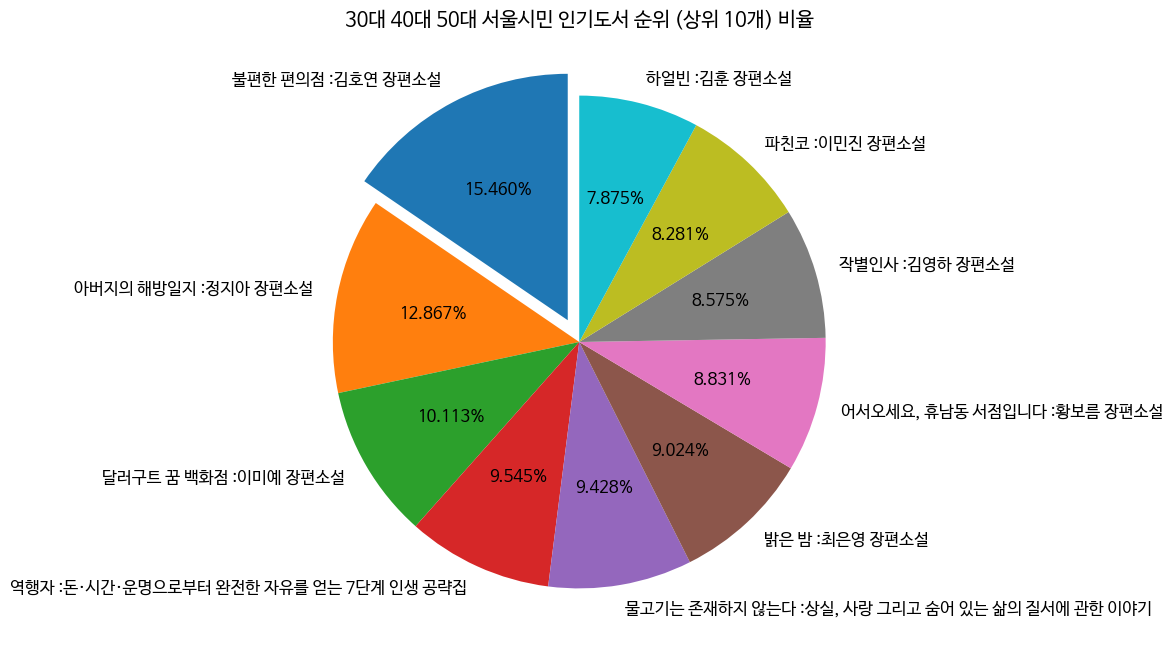

In [119]:
# import matplotlib.pyplot as plt

# # 상위 10개의 도서명과 해당 도서의 비율(퍼센트) 계산
# top_10_books = top_10_books_with_loan_count['도서명'].head(10)
# book_percentages = (top_10_books_with_loan_count['대출 횟수'].value_counts(normalize=True) * 100).head(10)
# print(top_10_books)
# print(book_percentages)
# # 파이 그래프로 나타내기
# # plt.figure(figsize=(8, 8))
# # plt.pie(book_percentages, labels=top_10_books, autopct='%.3f%%', startangle=90, explode=[0.1]+[0]*9)
# # plt.title('30대 40대 50대 서울시민 인기도서 순위 (상위 10개) 비율')
# # plt.show()

import matplotlib.pyplot as plt

# 상위 10개의 도서명과 해당 도서의 비율(퍼센트) 계산
top_10_books = top_10_books_with_loan_count['도서명'].head(10)
book_percentages = (top_10_books_with_loan_count['대출 횟수'] / top_10_books_with_loan_count['대출 횟수'].sum() * 100).head(10)

# 파이 그래프로 나타내기
plt.figure(figsize=(8, 8))
plt.pie(book_percentages, labels=top_10_books, autopct='%.3f%%', startangle=90, explode=[0.1]+[0]*9)
plt.title('30대 40대 50대 서울시민 인기도서 순위 (상위 10개) 비율')
plt.show()

In [120]:
# 라이브러리 설치하기
!pip install wordcloud

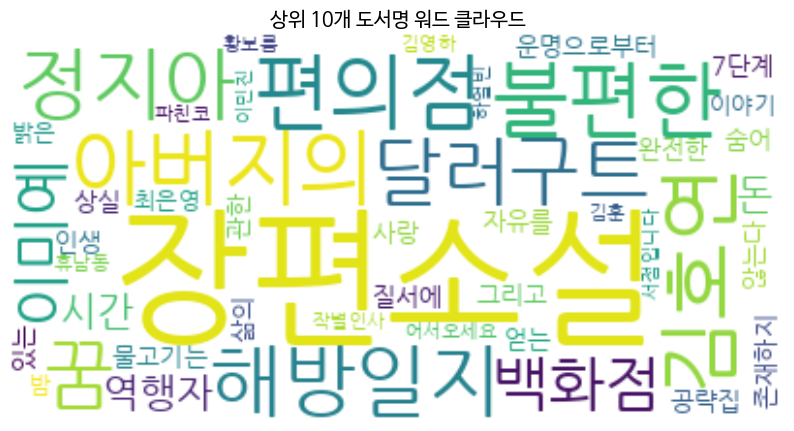

In [121]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 상위 10개의 도서명 추출
top_10_books_names = top_10_books_with_loan_count['도서명'].head(10)

# 워드 클라우드 생성
wordcloud = WordCloud(font_path='NanumGothic.ttf', background_color='white').generate(' '.join(top_10_books_names))

# 워드 클라우드 표시
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('상위 10개 도서명 워드 클라우드')
plt.axis('off')
plt.show()

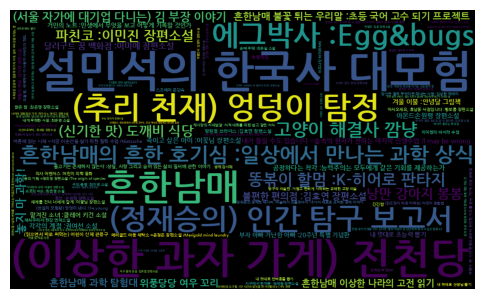

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. 자신의 컴퓨터 환경에 맞는 한글 폰트 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'  # (코랩)폰트 지정

# 도서명 데이터에서 단어 빈도 계산
word_frequencies = books_df['도서명'].value_counts().to_dict()

# 워드 클라우드 생성
wc = WordCloud(width=1000, height=600, background_color="black", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(word_frequencies))
plt.axis("off")
plt.show()

# 파일로 저장
wc.to_file('./인기도서_워드클라우드.png')

In [ ]:
import os
import sys
import urllib.request
import datetime
import time
import json
import pandas as pd

now = datetime.datetime.now()
datas = []   #csv파일을 위한 변수

client_id = ''          # 자신의 client_id
client_pw = ''          # 자신의 client_secret
PATH = './data'         # 수집 데이터 저장 폴더


#[CODE 1]
def get_RequestUrl(url):
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_pw)

    try:
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print(f"[{now.strftime('%Y년%m월%d일 %H시%M분%S초')}] Url Request Success")
            return response.read().decode('utf-8')

    except Exception as e:
#         if response.getcode() == 400 and datas:
#             return None
        print(e)
        print(f"[{now.strftime('%Y년%m월%d일 %H시%M분%S초')}] Error for URL : {url}" )
        return None


#[CODE 2]  네이버 검색 API
def get_NaverSearch(node, keyword, start, display):
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" % node
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(keyword), start, display)

    url = base + node + parameters
    responseDecode = get_RequestUrl(url)   #[CODE 1]

    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)

#[CODE 3]
def get_PostData(node, post, jsonResult, cnt):
    if node == 'book':
        data = {'제목':post['title'],
                '저자':post['author'],
                '출판사':post['publisher'],
                '출간일':post['pubdate'],
                '링크':post['link'],
                '이미지':post['image']}
    elif node == 'news':
        data = {'제목':post['title'],
                '링크':post['originallink'],
                '내용':post['description']}
    elif node == 'shop':
        data = {'제목':post['title'],
                '브랜드':post['brand'],
                '제조사':post['maker'],
                '가격':post['lprice'],
                '이미지':post['image']}

    jsonResult.append(data)
    datas.append(data)

    return

#[CODE 0]
def main():
    global node, keyword

    nodeType = '''-----------------------------
    네이버 검색 대상입니다.
      1.book,  2.news,  3.shop
    -----------------------------'''
    print(nodeType)
    node = input('번호를 선택하세요.[1:책, 2:뉴스, 3:쇼핑]')
    if node == '1': node = 'book'
    elif node == '2': node = 'news'
    elif node == '3': node = 'shop'
    else:
        node == '1'
        node = 'book'

    keyword = input(f'{node} 검색할 검색어를 입력하세요: ')

    display, cnt = 100, 0
    jsonResult = []
    jsonResponse = get_NaverSearch(node, keyword, 1, display)  #[CODE 2]
    total = jsonResponse['total']

    while ((jsonResponse != None) and (jsonResponse['display'] != 0)):
        for post in jsonResponse['items']:
            cnt += 1
            get_PostData(node, post, jsonResult, cnt)  #[CODE 3]

        start = jsonResponse['start'] + jsonResponse['display']
        jsonResponse = get_NaverSearch(node, keyword, start, total)
#     print(f'가져올 데이터 : {total} 건')

    # with open(f'{PATH}/naver_{node}_{keyword}', 'w', encoding='utf8') as outfile:
    #     jsonFile = json.dumps(jsonResult,  indent=4, sort_keys=True,  ensure_ascii=False)

    #     outfile.write(jsonFile)

    print("가져온 데이터 : %d 건" %(cnt))



    # csv 파일로 저장하기
    file = f'{PATH}/naver_{node}_{keyword}.csv'
    df = pd.DataFrame(datas)
    df.to_csv(file, index=False, encoding="utf-8-sig")
    print(f'{PATH}/naver_{node}_{keyword}.csv SAVED')
    return df

#-----------
# 시작
#-----------
df = main()
df



---



#### (24.2.29 서비스 종료됨)[실습] :  네이버 Papago API 사용하여 번역하기

In [ ]:
# import os
# import sys
# import urllib.request
# import datetime
# import json


# client_id = ''  # 자신의 파파고 NMT API ID
# client_pw = ''            # 자신의 파파고 NMT API PASSWORD

# news = []   #csv파일을 위한 변수

# #[CODE 1]
# def papago(prompt, lang=1):

#     encText = urllib.parse.quote(prompt)
#     if lang == 1 :
#         data = "source=ko&target=en&text=" + encText
#     else:
#         data = "source=en&target=ko&text=" + encText
#     url = "https://openapi.naver.com/v1/papago/n2mt"

#     req = urllib.request.Request(url)
#     req.add_header("X-Naver-Client-Id", client_id)
#     req.add_header("X-Naver-Client-Secret", client_pw)

#     try:
#         response = urllib.request.urlopen(req, data=data.encode("utf-8") )
#         if response.getcode() == 200:
#             print(f"[{now.strftime('%Y년%m월%d일 %H시%M분%S초')}] Url Request Success")
#             responseDecode = response.read().decode('utf-8')

#             if responseDecode == None:
#                 return None
#             else:
#                 return json.loads(responseDecode)

#     except Exception as e:
#         print(e)
#         print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
#         return None

# # 메인
# lang= int(input('[선택] 1:한글->영어, 2:영어->한글: '))
# txt =  '한글' if lang==1 else '영어'
# prompt= input(f'[번역] 변환할 문장을 입력하세요.[{txt}로 입력]: ')

# jsonResponse = papago(prompt, lang)  # 파파고 번역
# jsonResponse
# print('-'*50)
# print(f"[번역 결과] => {jsonResponse['message']['result']['translatedText']}")


-------------------------

### <a name="2)한글텍스트Cleansing">2) 한글 텍스트 Cleansing</a>

#### 1.라이브러리 설치

In [ ]:
# 자연어처리 형태소 분석 및 토큰화
!pip install nltk

In [ ]:
# (한글)자연어처리 형태소 분석 및 토큰화
# (WinOS에서는 konlpy를 사용하기 위해 JDK를 설치해야 오류가 없어 코랩에서 실행함)
!pip install konlpy

In [ ]:
# html tag parsing을 위한 라이브러리
!pip install beautifulsoup4

In [ ]:
# 사이킷런 CountVectorizer클래스 사용 : 단어 빈도수 추출
!pip install scikit-learn

#### 2.한글 테스트 자연어 처리(Text Cleansing)
- 앞에서 OpenAPI를 사용하여 뉴스 데이터를 가져온 뒤에 아래 코트를 실행시키도록 한다.


In [ ]:
import pandas as pd
import re
from bs4 import BeautifulSoup
import konlpy
import nltk

def clean_korean_documents(documents):
    #텍스트 정제 (HTML 태그 제거)
    for i, document in enumerate(documents):
        document = BeautifulSoup(document, 'html.parser').text
        documents[i] = document

    #텍스트 정제 (특수기호 제거)
    for i, document in enumerate(documents):
        document = re.sub(r'[^ ㄱ-ㅣ가-힣]', '', document) #특수기호 제거, 정규 표현식
        documents[i] = document

    #텍스트 정제 (형태소 분석)
    for i, document in enumerate(documents):
        okt = konlpy.tag.Okt()
        clean_words = []
        for word in okt.pos(document, stem=True): #어간 추출
            if word[1] in ['Noun', 'Verb', 'Adjective']: #명사, 동사, 형용사
                clean_words.append(word[0])
        document = ' '.join(clean_words)
        documents[i] = document

    #텍스트 정제 (불용어 제거)
    df = pd.read_csv('https://raw.githubusercontent.com/cranberryai/todak_todak_python/master/machine_learning_text/clean_korean_documents/korean_stopwords.txt', header=None)
    df[0] = df[0].apply(lambda x: x.strip())
    stopwords = df[0].to_numpy()
    nltk.download('punkt')
    for i, document in enumerate(documents):
        clean_words = []
        for word in nltk.tokenize.word_tokenize(document):
            if word not in stopwords: #불용어 제거
                clean_words.append(word)
        documents[i] = ' '.join(clean_words)

    return documents


def clean_target_feature(data):
    x_data = data.to_list()
    return clean_korean_documents(x_data)



# ---------------------
# 1.클린징할 파일 가져오기
file = f'{PATH}/naver_{node}_{keyword}.csv'  # 앞에서 만들어진 파일 사용하기
df = pd.read_csv(file)

# 2.클린징할 컬럼 선택해서 클린징하기
# (앞 OpenAPI검색에서 2.news 검색을 한 후 실행하기)
df['제목'] = clean_target_feature(df['제목'])  # 기사 제목
df['내용'] = clean_target_feature(df['내용'])  # 기사 내용

# 3.클린징 결과 csv 파일로 저장하기
file = f'{PATH}/naver_{node}_{keyword}_clean.csv'
df.to_csv(file, index=False, encoding="utf-8-sig")
print(f'{file} SAVED')

df.head()


#### 3.워드 클라우드 만들기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

# 말뭉치를 토큰화하여 빈도수 가져오기
def get_wordTokenCount(corpus):
    from sklearn.feature_extraction.text import CountVectorizer

    # 말뭉치를 토큰화하기
    vect = CountVectorizer().fit(corpus)
    count = vect.transform(corpus).toarray().sum(axis=0)

    # 토큰 빈도수로 정렬하고 토큰명 추출
    idx = np.argsort(-count)  # 내림 정렬하여 인덱스 반환: 토큰의 인덱스
    count = count[idx]        # 토큰의 빈도수
    feature_name = np.array(vect.get_feature_names_out())[idx]  # 토큰값

    # 빈도수 많은 순서대로 토큰명 10개만 출력
    print(list(zip(feature_name, count))[:10])

    return feature_name, count


# 단어(토큰) 빈도수 막대 그래프 그리기
def draw_wordTokenCountGraph(data, freq):
    plt.bar(data, freq)
    plt.grid()
    plt.show()

    # 그래프 그림 저장히기
    plt.savefig(f'./token_bar_graph.png')

# 워드클라우드 만들기
def make_wordcloud(feature_name, count):
    # 한글 폰트 경로를 설정
    # font_path = 'NanumGothic'  #/usr/share/fonts/truetype/nanum/NanumGothic.ttf  #코랩
    font_path = 'malgun'  # C:/Windows/Fonts/                                  #window

    # (토큰명, 빈도수) 딕셔너리 타입으로 변환
    data = dict(zip(feature_name, count))

    # 워드클라우드로 그래프로 시각화
    wc = WordCloud(width = 1000, height = 600, background_color="black", font_path=font_path)
    plt.imshow(wc.generate_from_frequencies(data)) #딕셔너리
    plt.axis("off")
    plt.show()

    # 이미지 파일로 저장하기
    wc.to_file(f'./워드클라우드.png')


In [ ]:
import pandas as pd

# 1.텍스트 말뭉치(corpus) 데이터 지정하기
corpus = df['제목'].to_list()
# print(corpus)

# 2.말뭉치를 토큰화하여 빈도수 가져오기
feature_name, count = get_wordTokenCount(corpus)

# 3.단어(토큰) 빈도수 막대 그래프 그리기(상위 10개)
# draw_wordTokenCountGraph(feature_name[:10], count[:10])

# 3.워드 클라우드 만들기
make_wordcloud(feature_name, count)



---



### <a name="3)웹이미지수집하기">3) 웹 이미지 수집하기</a>

#### 1.웹 이미지 화면에 출력하기

In [ ]:
from IPython.display import Image
Image(url='https://shopping-phinf.pstatic.net/main_3815224/38152244716.20230516165404.jpg')

#### 2.웹 이미지 파일로 저장하기

In [ ]:
import requests
from io import BytesIO
from PIL import Image

# 다운받을 이미지 url
urls = [
    "https://shopping-phinf.pstatic.net/main_3815224/38152244716.20230516165404.jpg",
    "https://shopping-phinf.pstatic.net/main_3726611/37266116619.20230119071117.jpg"
]
# 파일로 저장하기
for idx, url in enumerate(urls):
    res = requests.get(url)                   # url 요청
    img = Image.open(BytesIO(res.content))    # 응답결과(res.content)바이트파일 이미지 파일로 오픈
    img.save(f'./testimg_{idx}.png', 'png')   # 'png'이미지로(만) 저장

#### [실습] : 웹 이미지 수집하기
- 앞에서 저장한 쇼핑 목록에 있는 URL을 이용하여 이미지 저장하기

In [ ]:
# 이미지 다운로드 하기
import pandas as pd
import requests
from io import BytesIO
from PIL import Image
import time
import os

# 자신에게 맞게 폴더/파일 위치 정보를 수정한다.
FILE = f'./data/naver_shop_샌들.csv'  # 앞에서 자신이 검색한 쇼핑 파일
ImgFolder = f'./image/download/'      # 다운받을 이미지 폴더
MAX = 10                              # 이미지 파일 다운로드 건수

def getImageUrl(file):
    print(f'읽은 파일명: {file}')
    df = pd.read_csv(file, encoding='utf-8') # 이미지가 있는 쇼핑 파일 불러오기
    return df['이미지'].to_list()

def createDirectory(directory): # 다운받을 이미지 폴더 만들기
    try:
        if not os.path.exists(directory):
            print(f'{directory} 폴더가 생성되었습니다.')
            os.makedirs(directory)
        print(f'이미지 폴더 위치 : {directory}')
    except OSError:
        print("Error: Failed to create the directory.")

def downloadImageFile(urls, imgfolder):
    start = time.time()             # 이미지 다운로드 속도 time check
    for idx, url in enumerate(urls):
        if idx == MAX:
            break  # MAX 건수만 처리하기
        res = requests.get(url)     # request.get 요청
#         print(f'[{idx+1:2>}][{time.time() - start}] : {url}')  # 이미지 다운로드 시간 체크
        print(f'[{idx+1:0>2}] : {url}')  # 이미지 다운로드 시간 체크
        img = Image.open(BytesIO(res.content))  #Img open
        img.save(f'{imgfolder}testimage_{idx}.png', 'png')
    return idx


urls = getImageUrl(FILE)                # 이미지 URL 목록 가져오기
createDirectory(ImgFolder)              # 다운받을 이미지 폴더 만들기
totalcnt = downloadImageFile(urls, ImgFolder)      # 이미지 다운로드하기
print(f'총 다운로드 건수: {totalcnt}')


---------------------------

끝!